Nom Prénom : **Cheikh Amine**
 
Promotion : **M2 IWOCS**

# Exercice 1

Chargement des données + affichage du nuage de points (x,y): 

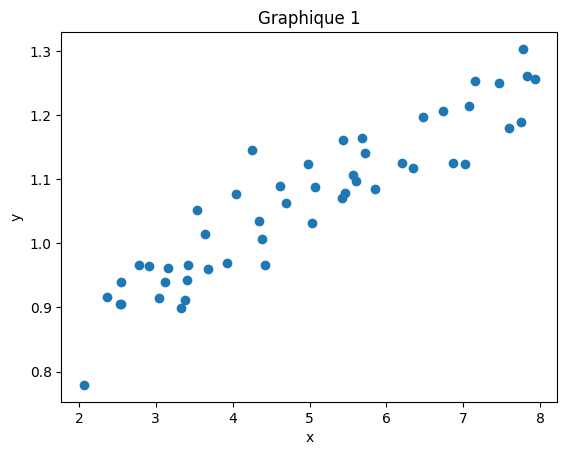

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# Question 1 
x = np.loadtxt('ex1dat/ex1x.dat')
y = np.loadtxt('ex1dat/ex1y.dat')
# Question 2
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique 1')
plt.show()


3. Définition de la fonction hypothèse :

In [2]:
theta = [0,1]
def h(x,theta):
      return theta[0] + theta[1] * x  

4. Définition de la fonction coût : 

In [3]:
from numpy import square


m = len(x)
print('Nombre de valeurs m =',m)

def J(theta): 
    result = 0
    # on définit l'écart entre 2 valeurs  et en faire la somme
    for i in range(m): 
        result += (h(x[i],theta)-y[i])**2
    result = (1/(2*m))*result
    
    return result    

Nombre de valeurs m = 50


5. On définit une fonction qui effectue une itération et qui va renvoyer $\theta_0^*$ et $\theta_1^*$ à partir de $\theta_0$ et $\theta_1$ en utilisant la déscente de gradient : 

In [4]:
def gradient_descent(alpha=0.07):
# On commence avec pour valeurs initiales de theta 1 et 0 = 0
    theta = np.array([0.0, 0.0])
    
# On calcule la nouvelle valeur de gradiant     
    somme_ecart_1 = np.sum((h(x, theta) - y))
    somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
    theta_new = np.array([
        theta[0] - alpha * (1/m) * somme_ecart_1,
        theta[1] - alpha * (1/m) * somme_ecart_2
    ])
    
    return theta_new
        
# Utilisation 
theta_optimal = gradient_descent(alpha=0.07)
print("Paramètres optimaux :", theta_optimal)              

Paramètres optimaux : [0.07452802 0.38002167]


6. On fais maintenant tourné la méthode sur quelques itérations (ici on choisit 5 itérations par défaut) ensuite  on représente la droite de l'expression : $$y = \theta_0 + \theta_1 \cdot x$$ sur le nuage de points 

In [5]:
def gradient_descent(num_iterations=5):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
# Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()
print("Paramètres optimaux :", theta_optimal) 
             

Paramètres optimaux : [0.09040987 0.35100519]


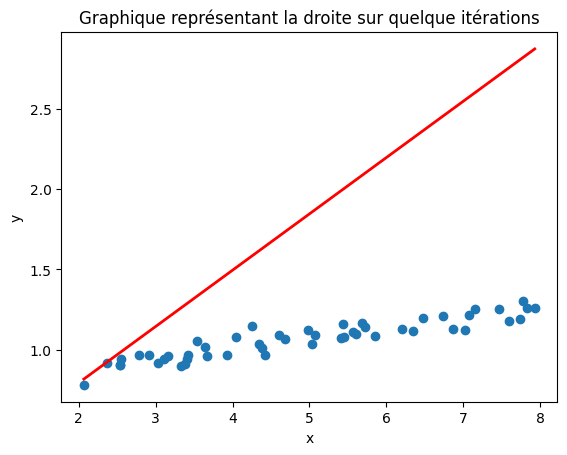

In [6]:
y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite sur quelque itérations')
plt.show()

7. Faire tourner la méthode en définisant un **critère d'arrêt du processus itératif** pour convergé vers la solution recherchée. 

Voici comment s'exprime le critère de d'arrêt : 

$$
\left| \frac{J(\theta^*) - J(\theta)}{J(\theta)} \right| < 10^{-3}
$$


In [7]:
def gradient_descent(num_iterations=1000):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
    # Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        # Condition pour éviter la division par 0 dès la première itération
        if J(theta) > 0 : 
            # Critère d'arret
            op = (J(theta_new)-J(theta))/J(theta)
            norm_op = abs(op) 
            if norm_op < 10**-3 : 
                print("Critère d'arrêt vérifié !")
                print("Valeur optimal des paramètres : ",theta_new)
                break
            
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()

             

Critère d'arrêt vérifié !
Valeur optimal des paramètres :  [0.71385319 0.07048728]


Affichage de la droite obtenu suite a cette convergence sur le nuages de points :

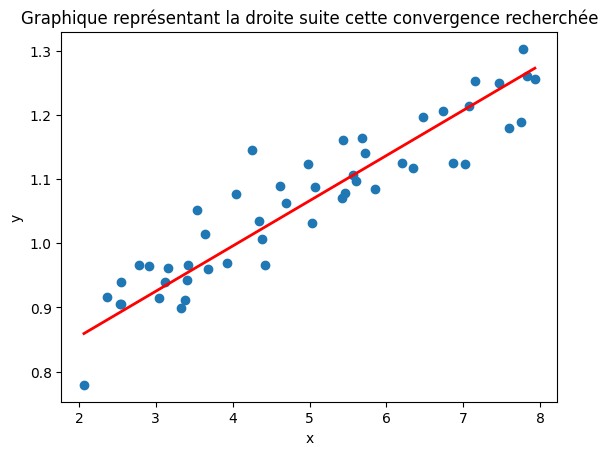

In [8]:
y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite suite cette convergence recherchée')
plt.show()

8. On peut maintenant à partir de ce modèle prédire la taille de 3 enfants de 3,5 et 7 ans : 

D'après la lecture du graphique on un enfant : 
- de 3 ans mesure environ 86 cm
- de 5 ans mesure environ 105 cm 
- de 7 ans mesure environ 120 cm 

9. Visualisation de la fonction coût sur une grille de taille 100 x 100

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

# On crée une liste de valeurs répartie sur l'intervalle [-30,30] de theta0
theta_0_values = np.linspace(-30,30,100)
# On créer une liste de valeurs répartie sur l'intervalle [-3,3] de theta1
theta_1_values = np.linspace(-3,3,100)

#  On initialise la matrice qui va contenir toute les valeurs possible de la fonction coût en fonction de (theta0,theta1) 
Jvalues = np.zeros((len(theta_0_values),len(theta_1_values)))

# On calcule toutes les valeurs sur les 10 000 paires de valeurs (theta0,theta1)
for i, t0 in enumerate(theta_0_values):
    for j, t1 in enumerate(theta_1_values): 
        Jvalues[i][j] = J(np.array([theta_0_values[i],theta_1_values[j]]))
        
    

On affiche le rendu 3D : 

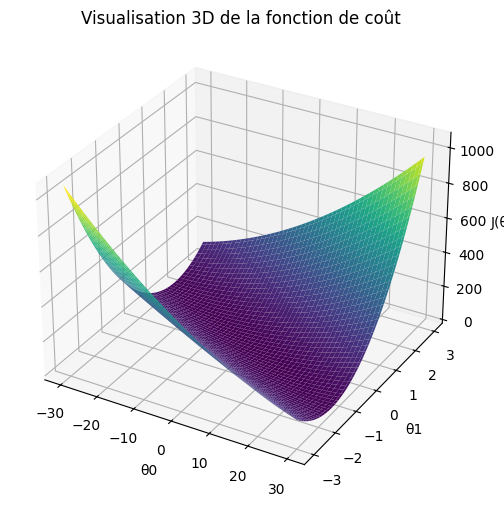

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

T0, T1 = np.meshgrid(theta_0_values, theta_1_values)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0,T1,Jvalues,cmap='viridis')

ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J(θ)')
plt.title("Visualisation 3D de la fonction de coût")
plt.show()

# Exercice 2

1. Utiliser la fonction  loadtxt du package  numpy en Python (ici désigné par  np ).
Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :

In [11]:
import numpy as np 

x = np.loadtxt('ex2dat/ex2x.dat')
y = np.loadtxt('ex2dat/ex2y.dat')

# On affiche les 5 premières valeurs pour vérifié 
print("x : \n",x[:5]) 
print("y : \n",y[:5]) 

x : 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
y : 
 [399900. 329900. 369000. 232000. 539900.]


2. Normalisation des données : 

In [12]:
import sklearn as sk

scaler = sk.preprocessing.StandardScaler()

dataX_norm = scaler.fit_transform(x)

print("Données normaliser :",dataX_norm[:5])

Données normaliser : [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


3. 
Définir les fonctions en Python sous forme matricielle pour représenter la fonction d'hypothèse, le vecteur tel défini dans le cours :[...] , la fonction décrivanrt une itération et la fonction de coût J($\theta$) 

In [13]:

# On construit la matrice X augmentée et le vecteur Y 
X = np.c_[np.ones(dataX_norm.shape[0]), dataX_norm]
Y = y 

print("\n Matrice X : \n",X[:5])
print("\n Vecteur Y : \n",Y[:5])

# Fonction hypothèse
def h(theta,X):
     return X @ theta


theta_test1 = np.array([1.0, 2.0, -0.5])  # [θ0, θ1, θ2]
test = h(theta_test1,X)
print("\nTest fonction d'hyothèse : \n",test)      


 Matrice X : 
 [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]

 Vecteur Y : 
 [399900. 329900. 369000. 232000. 539900.]

Test fonction d'hyothèse : 
 [ 1.37587753  0.09376529  2.12886408  0.28984183  2.99103891  0.40900732
 -0.07413036 -0.34632483 -0.46588688 -0.1758853   0.29453301  1.11131468
  0.8314886   6.08673466 -0.75080071  1.21032746  0.04562998 -0.83220466
  1.99638437  3.06989899  0.51859216  1.49055012  0.10394078  0.35049822
  5.91923558 -1.17817146 -0.26746475  2.44939214  1.62008938  2.7317621
  1.36590032 -0.10426027  0.54892036  4.00369884 -0.03362667 -0.32088609
 -0.82457304  0.78295672  6.0818452   0.85927292  0.92072246  1.71675658
  1.88954169 -0.92378411 -1.14490282  0.07067214 -0.91615249]


Calcule du vecteur définit dans le cours ($E = h_{\theta}(X) - Y$
) : 

In [14]:
def E(theta,X,Y): 
    return h(theta,X) - Y

# Test
theta = np.array([1.0, 2.0, -0.5])
err = E(theta, X, Y)
print(err[:5])


[-399898.62412247 -329899.90623471 -368997.87113592 -231999.71015817
 -539897.00896109]


Définition de la  fonction coût $J(\theta)$: 

In [15]:

def J(theta,X,Y):
    # Variable du resultat de la fonction cout  
    res = None
    m = X.shape[0]
    # Somme critère des moindre carré 
    somme_crit = np.sum(E(theta,X,Y)**2)
    
    res = (1.0/(2*m))*(somme_crit)
    return res

result_test = J(theta_test1,X,Y)
print("Test fonction coût :\n",result_test)

Test fonction coût :
 65591023522.006805


fonction décrivant une itération pour calculer une nouvelle valeur de theta : 

In [ ]:
def iteration(theta, X, Y, alpha=0.07):
    theta = np.asarray(theta, dtype=float)
    m = X.shape[0]
    e = E(theta, X, Y)                      
    assert e.shape[0] == m
    grad = (1.0 / m) * (X.T @ e)            
    theta_next = theta - alpha * grad
    return theta_next
    

4. Pour la valeur du taux d'apprentissage $\alpha = 0{,}07$, effectuez le calcul de régression permettant d'obtenir le vecteur $\theta = (\theta_0, \theta_1, \theta_2)$ optimal, afin de calculer la meilleure régression linéaire multivariée sur le jeu de données d'apprentissage :

In [17]:
def gradient(X,Y, alpha = 0.07, nb_iterations_max = 2500, e = 1e-6): 
    # Initialisation 
    theta = np.zeros(X.shape[1])
        
    for i in range(nb_iterations_max): 
        theta_old = theta.copy()    # on copie la valeur de theta 
        
        theta = iteration(theta,X,Y,alpha) # calcule de la nouvelle valeur optimal du vecteur theta
        
        # Afficher le progrès
        if i % 100 == 0:  
            print(f"Itération {i:4d}: Theta = {theta}")
            
        # Critère d'arrets (différence relative)
        if i > 0: # condition pour eviter les division par zéro à la première itération 
           
           # Calcule |θ^(n+1) - θ^(n)| 
           diff_theta = np.linalg.norm(theta-theta_old)
           
           #Calcule de theta |θ^(n)|
           norm_theta_old = np.linalg.norm(theta_old)
            
            # Éviter la division par zéro  
           if norm_theta_old > 1e-10: 
            # Calcule du critère d'arrêt 
              diff_rel = diff_theta / norm_theta_old
              
              # Vérifier le critère d'arrêt
              if diff_rel < e :
                  print(f"Critère d'arrêt déclencher ! Fin de la boucle") 
                  break
            
    else : 
        print("Nombre d'itération maximum atteint ! ")
                   
    print(f"Theta optimal :{theta}")
    
    return theta      
            
# Utilisation 
theta_optimal = gradient(X,Y,alpha = 0.07, e=1e-6)            

Itération    0: Theta = [23828.88617021  7403.4893445   3829.61752291]
Itération  100: Theta = [340189.41366678 106985.99621642  -4117.42596665]
Itération  200: Theta = [340412.50214778 109340.04737273  -6470.60576553]
Critère d'arrêt déclencher ! Fin de la boucle
Theta optimal :[340412.65921994 109440.01514972  -6570.57353424]


5.  Nous allons maintenant automatiser la recherche du meilleur taux d'apprentissage
. Pour ce faire, on devra calculer pour chaque itération la valeur de
la fonction de coût  et on stockera toutes ces valeurs dans un vecteur. Comme
on veut sélectionner un taux d'apprentissage efficace, on va comparer les résultats
de calcul de  sur 50 itérations en changenat de taux d'apprentissage à chaque
𝛼∈[0, 001; 10]. pour ce faire on stockera toutes ces valeurs dans un vecteur. Comme on veut sélectionner un taux d'apprentissage efficace, on va comparer les résultat de calcul de J(theta) sur 50 itérations en changant le taux d'apprentissage à chaque série d'itérations. 
Les valeurs de ce taux doivent rester entre [0.001;10]. 

In [18]:
def gradient_with_comparison(X, Y, nb_tests=20, iterations_par_test=50, e=1e-6): 
    """
    Compare différents taux d'apprentissage sur 50 itérations chacun
    """
    best_alpha = None
    best_cost = float('inf')
    alpha_costs = []
    all_costs_evolution = []  # Pour tracer les courbes
    
    print("=== Comparaison de différents taux d'apprentissage ===")
    
    for test in range(nb_tests):
        # Générer un alpha aléatoire dans [0.001, 10]
        alpha = np.random.uniform(0.001, 10)
        
        # Initialiser theta pour ce test
        theta = np.zeros(X.shape[1])
        cout_evolution = []
        
        # Faire exactement 50 itérations avec cet alpha
        for i in range(iterations_par_test):
            theta = iteration(theta, X, Y, alpha)
            cout = J(theta, X, Y)
            cout_evolution.append(cout)
        
        # Stocker les résultats
        cout_final = cout_evolution[-1]
        alpha_costs.append((alpha, cout_final))
        all_costs_evolution.append((alpha, cout_evolution))
        
        # Comparer avec le meilleur
        if cout_final < best_cost:
            best_cost = cout_final
            best_alpha = alpha
            print(f"Test {test+1:2d}: Nouveau meilleur α = {alpha:.4f}, J(θ) = {cout_final:.4f} ⭐")
        else:
            print(f"Test {test+1:2d}: α = {alpha:.4f}, J(θ) = {cout_final:.4f}")
    
    print(f"\n=== Résultats de la comparaison ===")
    print(f"Meilleur taux d'apprentissage: α = {best_alpha:.4f}")
    print(f"Meilleur coût après 50 itérations: J(θ) = {best_cost:.4f}")
    
    return best_alpha, alpha_costs, all_costs_evolution

def convergence_complete_avec_meilleur_alpha(X, Y, best_alpha, e=1e-6, max_iter=2500):
    """
    Calcule θ optimal jusqu'à convergence avec le meilleur alpha trouvé
    """
    print(f"\n=== Convergence complète avec α = {best_alpha:.4f} ===")
    
    theta = np.zeros(X.shape[1])
    cout_vector = []
    
    for i in range(max_iter):
        theta_old = theta.copy()
        theta = iteration(theta, X, Y, best_alpha)
        cout = J(theta, X, Y)
        cout_vector.append(cout)
        
        # Afficher le progrès
        if i % 100 == 0:
            print(f"Itération {i:4d}: J(θ) = {cout:.6f}")
        
        # Critère d'arrêt
        if i > 0:
            diff_theta = np.linalg.norm(theta - theta_old)
            norm_theta_old = np.linalg.norm(theta_old)
            
            if norm_theta_old > 1e-10:
                diff_rel = diff_theta / norm_theta_old
                
                if diff_rel < e:
                    print(f"Convergence atteinte à l'itération {i}")
                    break
    else:
        print("Nombre d'itération maximum atteint")
    
    print(f"Theta optimal final: {theta}")
    return theta, cout_vector

best_alpha, alpha_costs, all_costs_evolution = gradient_with_comparison(X, Y, nb_tests=20, iterations_par_test=50)

# Afficher le top 5 des meilleurs taux d'apprentissage
print("\n=== Top 5 des meilleurs taux d'apprentissage ===")
alpha_costs_triees = sorted(alpha_costs, key=lambda x: x[1])[:5]
for i, (alpha_val, cost_val) in enumerate(alpha_costs_triees):
    print(f"{i+1}. α = {alpha_val:.4f}, J(θ) = {cost_val:.4f}")

# Convergence complète avec le meilleur alpha trouvé
theta_optimal, cout_vector = convergence_complete_avec_meilleur_alpha(X, Y, best_alpha)


=== Comparaison de différents taux d'apprentissage ===
Test  1: Nouveau meilleur α = 1.1131, J(θ) = 2043280050.6030 ⭐
Test  2: α = 2.2192, J(θ) = 5541800313366899381978497778679118491092449755136.0000
Test  3: α = 9.4871, J(θ) = 4000938678761897263326962565812948227043809214410328678270462054058840301432796006133171920669909816065163097686525784096768.0000
Test  4: α = 5.0413, J(θ) = 1881952985589762803706793609064706921733130112450789871049513914917526567306708402849865269248.0000
Test  5: α = 4.0412, J(θ) = 11949138942742891588724083037454627855397866371188140977789294584064624306404982784.0000
Test  6: α = 4.5066, J(θ) = 4453913788018894543650632450301554588333230216825710548117232388790312205088319650922496.0000
Test  7: α = 4.3768, J(θ) = 146152791914402046500877227417012089667076053179081534881581145719529502183939503030272.0000
Test  8: α = 3.5138, J(θ) = 570897105420427295382750598201126549399576467982569647238716200799761858560.0000
Test  9: α = 2.4825, J(θ) = 2774754902695785

Visualisation : 


=== Visualisation des courbes de comparaison ===


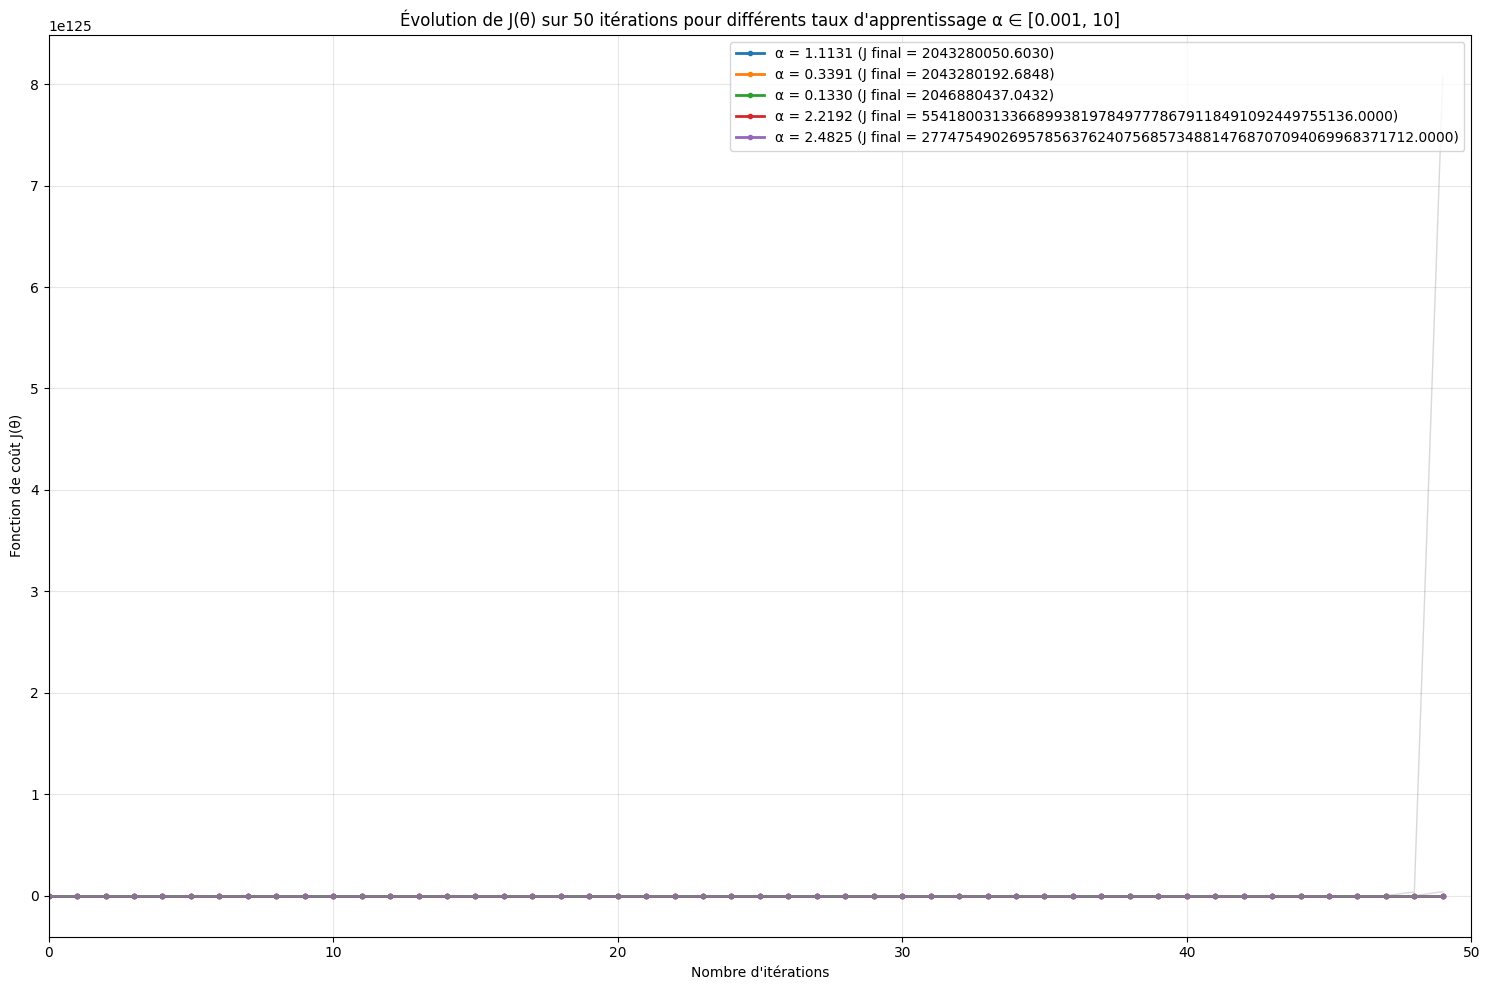


=== Visualisation de la convergence finale ===


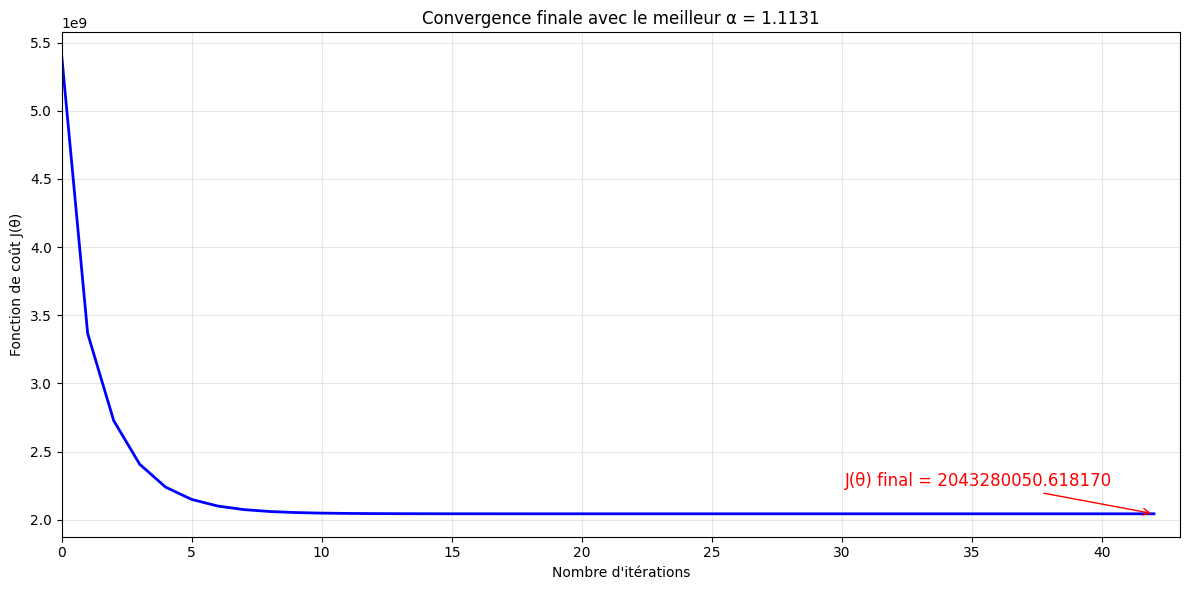


=== Prédiction pour un logement de 1650 m² et 3 pièces ===
Prix prédit: 293081.40

=== Résumé final ===
- Meilleur α trouvé: 1.1131
- Theta optimal: [340412.65957447 109447.89563927  -6578.25568451]
- Nombre d'itérations pour la convergence: 43
- Coût final: J(θ) = 2043280050.618170


In [19]:
import matplotlib.pyplot as plt

# Visualisation des courbes de comparaison des alphas
print("\n=== Visualisation des courbes de comparaison ===")

plt.figure(figsize=(15, 10))

# Trier par coût final pour mettre en évidence les meilleurs
sorted_results = sorted(all_costs_evolution, key=lambda x: x[1][-1])

# Tracer toutes les courbes
for i, (alpha, cout_evolution) in enumerate(sorted_results):
    if i < 5:  # Les 5 meilleurs en couleurs distinctes et traits pleins
        plt.plot(range(len(cout_evolution)), cout_evolution, 
                linewidth=2, marker='o', markersize=3,
                label=f"α = {alpha:.4f} (J final = {cout_evolution[-1]:.4f})")
    else:  # Les autres en gris transparent
        plt.plot(range(len(cout_evolution)), cout_evolution, 
                color='gray', alpha=0.3, linewidth=1)

plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût J(θ)')
plt.title('Évolution de J(θ) sur 50 itérations pour différents taux d\'apprentissage α ∈ [0.001, 10]')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)
plt.tight_layout()
plt.show()

# Visualisation de la convergence finale
print("\n=== Visualisation de la convergence finale ===")

plt.figure(figsize=(12, 6))

plt.plot(range(len(cout_vector)), cout_vector, 'b-', linewidth=2)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Fonction de coût J(θ)')
plt.title(f'Convergence finale avec le meilleur α = {best_alpha:.4f}')
plt.grid(True, alpha=0.3)
plt.xlim(0, len(cout_vector))

# Ajouter une annotation pour le coût final
plt.annotate(f'J(θ) final = {cout_vector[-1]:.6f}', 
            xy=(len(cout_vector)-1, cout_vector[-1]), 
            xytext=(len(cout_vector)*0.7, cout_vector[-1]*1.1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Prédiction pour un logement de 1650 m² et 3 pièces
print("\n=== Prédiction pour un logement de 1650 m² et 3 pièces ===")
nouveau_logement = np.array([[1650, 3]])  # Surface et nombre de pièces
nouveau_logement_norm = scaler.transform(nouveau_logement)  # Normalisation

# Construire correctement X_prediction avec le biais
X_prediction = np.c_[np.ones(nouveau_logement_norm.shape[0]), nouveau_logement_norm]

prix_predit = h(theta_optimal, X_prediction)
print(f"Prix prédit: {prix_predit[0]:.2f}")

print(f"\n=== Résumé final ===")
print(f"- Meilleur α trouvé: {best_alpha:.4f}")
print(f"- Theta optimal: {theta_optimal}")
print(f"- Nombre d'itérations pour la convergence: {len(cout_vector)}")
print(f"- Coût final: J(θ) = {cout_vector[-1]:.6f}")